# Exercise 1

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

## Voting data

(kaggle data small)

In [6]:
voting_train = pd.read_csv("CongressionalVotingID.shuf.lrn.csv")
voting_train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,15,republican,n,y,n,y,y,y,n,n,n,n,n,y,unknown,unknown,n,unknown
1,326,democrat,n,y,n,n,y,y,n,n,unknown,n,n,y,y,y,n,y
2,93,democrat,y,y,y,n,n,n,y,y,n,y,y,n,n,unknown,y,y
3,350,republican,n,y,y,y,y,y,y,y,y,n,n,y,y,y,n,y
4,283,republican,y,n,n,y,y,y,n,n,n,y,n,unknown,y,y,n,n


In [8]:
voting_test = pd.read_csv("CongressionalVotingID.shuf.tes.csv")
voting_test.head()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,275,y,n,n,y,y,n,y,n,n,y,n,n,n,y,y,y
1,266,y,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
2,247,n,n,y,n,y,n,y,y,y,n,n,n,n,y,unknown,y
3,328,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
4,232,n,y,n,y,y,y,n,n,y,y,n,y,y,y,n,y


In [40]:
voting_train.shape

(217, 17)

In [17]:
voting_train.groupby("class").size()

class
democrat      147
republican     71
dtype: int64

In [16]:
voting_train = voting_train.set_index("ID")

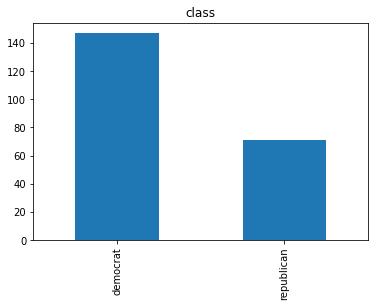

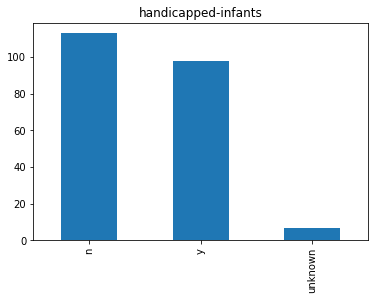

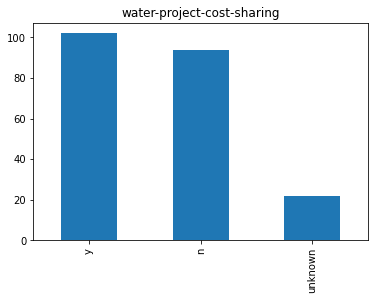

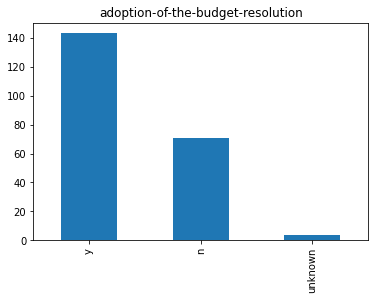

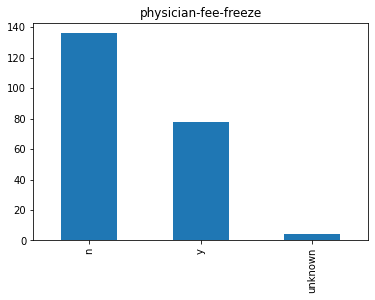

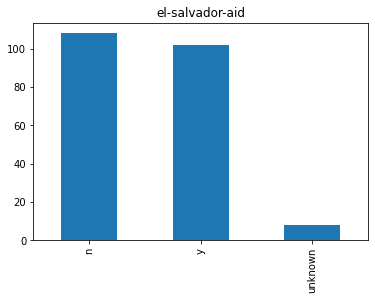

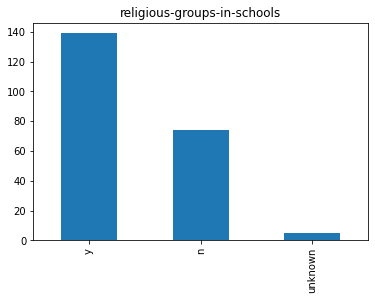

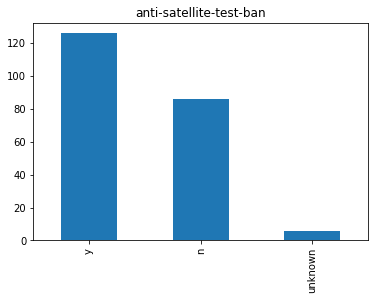

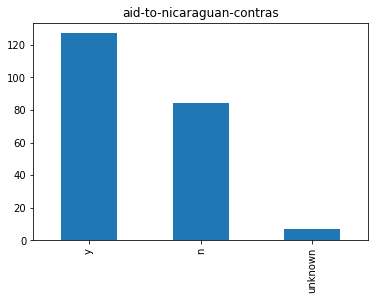

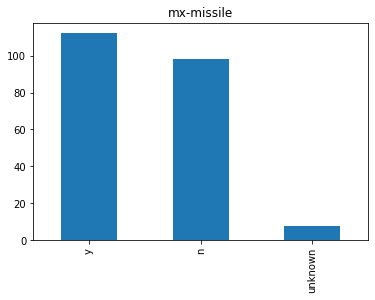

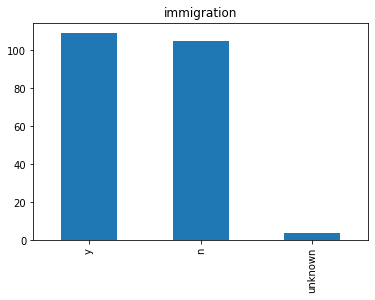

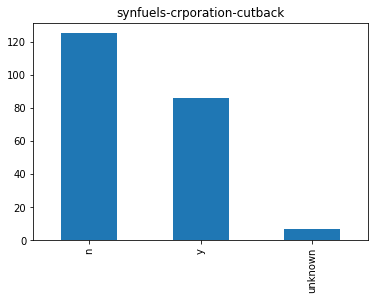

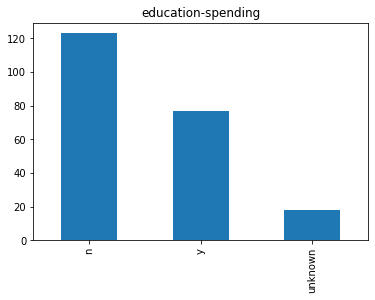

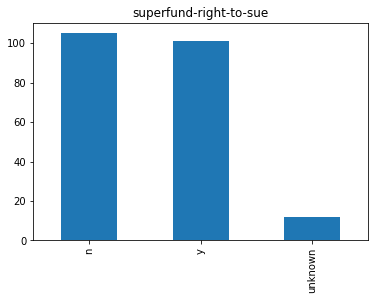

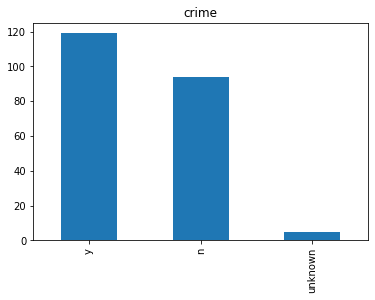

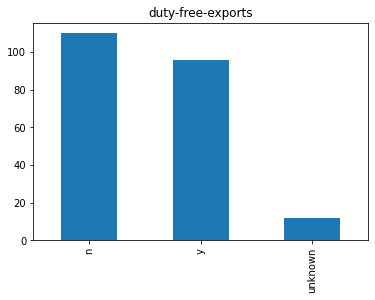

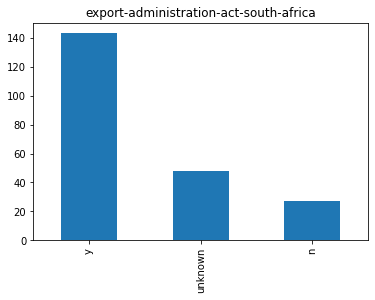

In [23]:
for col in voting_train.columns:
    voting_train[col].value_counts().plot(kind="bar",title=col)
    plt.show()

In [107]:
# check if there is a ID where more than 50% is missing
missing_by_id = (voting_train == "unknown").sum(axis=1)

missing_by_id[missing_by_id > 7]

Series([], dtype: int64)

In [39]:
# remove the one that has only missing infortmation
voting_train = voting_train.drop(axis=0,index=184)
len(voting_train)

217

In [46]:
voting_train.columns

Index(['class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-crporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(voting_train["handicapped-infants"])
list(le.classes_)

for col in voting_train.columns[1:]:
    voting_train[col] = le.transform(voting_train[col])


In [51]:
voting_train

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
ID,,,,,,,,,,,,,,,,,
15,republican,0,2,0,2,2,2,0,0,0,0,0,2,1,1,0,1
326,democrat,0,2,0,0,2,2,0,0,1,0,0,2,2,2,0,2
93,democrat,2,2,2,0,0,0,2,2,0,2,2,0,0,1,2,2
350,republican,0,2,2,2,2,2,2,2,2,0,0,2,2,2,0,2
283,republican,2,0,0,2,2,2,0,0,0,2,0,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,democrat,2,2,2,0,2,2,0,2,0,2,2,0,2,2,0,1
286,democrat,0,0,2,0,0,2,2,2,2,2,2,0,0,0,2,2
95,democrat,2,0,2,0,2,2,0,0,0,0,0,0,0,0,0,2


In [91]:
le = LabelEncoder()
le.fit(voting_train["class"])
list(le.classes_)

voting_train["class"] = le.transform(voting_train["class"])


In [92]:
from sklearn.model_selection import train_test_split

X= voting_train.iloc[:,1:]
y=voting_train["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [93]:
y_train.value_counts()

0    116
1     57
Name: class, dtype: int64

In [94]:
y_test.value_counts()

0    30
1    14
Name: class, dtype: int64

### Decision Tree

In [117]:
from sklearn import tree

clf = tree.DecisionTreeClassifier() # defining decision tree classifier
clf=clf.fit(X_train,y_train) # train 
prediction = clf.predict(X_test) 

In [96]:
from sklearn import metrics

print("confusion matrix:",metrics.confusion_matrix(y_test,prediction))
print("accuracy:",metrics.accuracy_score(y_test,prediction))
print("precision:",metrics.precision_score(y_test,prediction))
print("recall:",metrics.recall_score(y_test,prediction))
print("F1:",metrics.f1_score(y_test,prediction))

confusion matrix: [[29  1]
 [ 2 12]]
accuracy: 0.9318181818181818
precision: 0.9230769230769231
recall: 0.8571428571428571
F1: 0.888888888888889


[Text(176.21052631578948, 201.90857142857143, 'X[3] <= 1.5\ngini = 0.442\nsamples = 173\nvalue = [116, 57]'),
 Text(105.72631578947369, 170.84571428571428, 'X[3] <= 0.5\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(70.48421052631579, 139.78285714285715, 'X[2] <= 1.0\ngini = 0.019\nsamples = 107\nvalue = [106, 1]'),
 Text(52.863157894736844, 108.72, 'X[5] <= 1.0\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(35.242105263157896, 77.65714285714284, 'X[14] <= 1.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(17.621052631578948, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(52.863157894736844, 46.59428571428572, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(70.48421052631579, 77.65714285714284, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(88.10526315789474, 108.72, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(140.96842105263158, 139.78285714285715, 'X[8] <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(123.3473684210526

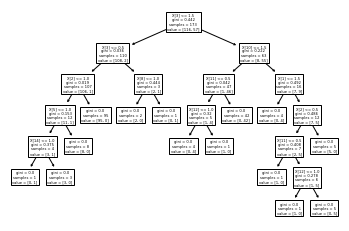

In [97]:
tree.plot_tree(clf)

In [134]:
# test on hold out set for kaggle
# 
# #voting_test = voting_test.set_index("ID")

le = LabelEncoder()
le.fit(voting_test["handicapped-infants"])
list(le.classes_)

for col in voting_test.columns:
    voting_test[col] = le.transform(voting_test[col])

# predict
clf.predict(voting_test) 

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### Random forest

In [135]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)

print("confusion matrix:",metrics.confusion_matrix(y_test,rf_prediction))
print("accuracy:",metrics.accuracy_score(y_test,rf_prediction))
print("precision:",metrics.precision_score(y_test,rf_prediction))
print("recall:",metrics.recall_score(y_test,rf_prediction))
print("F1:",metrics.f1_score(y_test,rf_prediction))

confusion matrix: [[29  1]
 [ 1 13]]
accuracy: 0.9545454545454546
precision: 0.9285714285714286
recall: 0.9285714285714286
F1: 0.9285714285714286


In [136]:
clf.predict(voting_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict Output
knn_prediction= knn.predict(X_test) 

print("confusion matrix:",metrics.confusion_matrix(y_test,knn_prediction))
print("accuracy:",metrics.accuracy_score(y_test,knn_prediction))
print("precision:",metrics.precision_score(y_test,knn_prediction))
print("recall:",metrics.recall_score(y_test,knn_prediction))
print("F1:",metrics.f1_score(y_test,knn_prediction))

confusion matrix: [[29  1]
 [ 1 13]]
accuracy: 0.9545454545454546
precision: 0.9285714285714286
recall: 0.9285714285714286
F1: 0.9285714285714286


In [106]:
knn = KNeighborsClassifier(n_neighbors=5,metric="hamming")

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict Output
knn_prediction2= knn.predict(X_test) 

print("confusion matrix:",metrics.confusion_matrix(y_test,knn_prediction2))
print("accuracy:",metrics.accuracy_score(y_test,knn_prediction2))
print("precision:",metrics.precision_score(y_test,knn_prediction2))
print("recall:",metrics.recall_score(y_test,knn_prediction2))
print("F1:",metrics.f1_score(y_test,knn_prediction2))

confusion matrix: [[29  1]
 [ 0 14]]
accuracy: 0.9772727272727273
precision: 0.9333333333333333
recall: 1.0
F1: 0.9655172413793104


In [139]:
knn2_preds = knn.predict(voting_test)
knn2_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

## Location data

(kaggle data large)

In [108]:
loc_train = pd.read_csv("Location446-30cls-5k.lrn.csv")
loc_train.head()

,ID,class,1,2,3,4,5,6,7,8,...,437,438,439,440,441,442,443,444,445,446
0,0,11,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [109]:
loc_train.shape

(4000, 448)

In [111]:
loc_test = pd.read_csv("Location446-30cls-5k.tes.csv")
loc_test.head()

,ID,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,4000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4001,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,4002,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4003,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Adult data

(from ex0)

In [116]:
adult = pd.read_csv("../Exercise0/Dataset1/adult.data",index_col=False, names = ["age","workclass","fnlwgt","education","eduucation-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])
adult.head()

,age,workclass,fnlwgt,education,eduucation-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## New data TBD